# Why Decision Trees are Awesome

A decision tree are *supervised* machine learning algorithms which can be used for both *classification* and *regression* problems. The model we create is *tree* based; we divide (branch) the data into subsets over and over again.

One great advantage of decision tree based models is that they can be very easy to interpret. This is because decision trees predict the value of a target variable (y) by learning simple decision rules inferred from the data features (X).

Today, we will have examples from both classification and regression problems with Decision Trees.

In [1]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive/"

Mounted at /content/drive


# Gambling with Lives Mathematically: Predicting Survival using Decision Trees

Remember the Titanic dataset from HW3?

We're going to use the same datset. Our aim will be to *predict whether a passenger survived or not* based on information we have on the passengers (gender, age, class etc.)

In [3]:
filename = "titanic.csv"
df = pd.read_csv(join(path_prefix, filename))

This is actually a simplified version of the Titanic dataset. It includes passenger information and shows whether a specific passenger survived or not after the accident.

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
# To see the size of our dataset
df.shape

(887, 8)

In [6]:
# Since we cannot use names for predictions, let's get rid of that column
# Also, we need to convert Sex column to a format that decision trees can accept

# This drops Name column
df = df.drop(['Name'], axis = 1)

# This will map males to 0 and females into 1 in Sex column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Checking the dataframe again
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [7]:
# Since we are interested in whether individuals survived the Titanic
# accident or not, our target label (y) should be the "Survived" column.
# We can use the other columns as our features (X)
# This means we are trying to predict the y using X.

# Then, we can divide decision label and features as;
X = df.drop('Survived', axis=1) # these are features
y = df['Survived']              # this is the target (what we want to predict)

Like we did for KNNs, we're going to use the Scikit Learn library to build our model.

In [8]:
from sklearn.model_selection import train_test_split

# This will create train and test datasets from the original dataset that we have where
# 80% of original dataframe will be train set and 20% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [9]:
print(X_train.shape, X_test.shape)

(709, 6) (178, 6)


In [10]:
from sklearn import tree

model = tree.DecisionTreeClassifier() #Create decision tree classifier object

In [11]:
model.fit(X_train, y_train) #train the classifier using the training data

DecisionTreeClassifier()

We did not specify any parameters when we build our decision tree but the model has many parameters. Let's go to the [documentation page](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) of the Decision Tree in scikit-learn and see what those are.

All the parameters the model can use are explained in detail.

It seems our decision tree uses a criterion to splits the data into different classes. Also, since we did not provide a criterion, the default one-- 'gini'-- was used to build our classifier.

The alternative criterion is 'entropy'.

#Interlude: Good Splitting Criteria Help Separate Data into  Uniform Groups

To understand these splitting criteria, let's consider a different example where a bank wants to classify 30 of its customers to detect whether giving loans to them is safe or not. They decide to use a decision trees based model to make their decisions. For this problem, they have two features which are <b>balance</b> and <b>residence</b>.

If the bank decides to use balance information to split in their decision trees at initial stage, resulting tree is;
 <img src="https://cdn-images-1.medium.com/max/1200/1*zMu0UClotNXljrjqmyRIHA.png"  width="500" >



In other case, if they decide to use residence information at initial stage, resulting tree is:


<img src="https://cdn-images-1.medium.com/max/1200/1*JaCz5L8AGreiPza3BLqF3Q.png"  width="500" >


Now, after inspecting each case bank should decide which feature to use for splitting the initial data they have. At this point 'gini' and 'entropy' calculations comes to the picture. Both of these notions are used for evaluating the result of a split in a decision tree.
Entropy and gini can be defined as;

$ Gini: Gini(E) = 1−∑^c_{j=1} p^2_j $

$ Entropy: H(E) = −∑^c_{j=1} p_j logp_j $

For each split operation, decision trees try to find the split that distinguishes label classes best. Below you can see how we can measure entropy and decide which of the features should be selected for the banking example by using 'entropy'.

If splitting is performed with 'balance' feature;

$ E(Initial) = - \dfrac{16}{30} log_2(\dfrac{16}{30}) - \dfrac{14}{30} log_2(\dfrac{14}{30}) \approx 0.99$

$ E(Balance < 50K) = - \dfrac{12}{13} log_2 (\dfrac{12}{13}) - \dfrac{1}{13} log_2(\dfrac{1}{13}) \approx 0.39$

$ E(Balance > 50K) = - \dfrac{4}{17} log_2 (\dfrac{4}{17}) - \dfrac{13}{17} log_2(\dfrac{13}{17}) \approx 0.79 $

We should calculate weighted average of entropies for each node

$ E(Balance) = \dfrac{13}{30} 0.39 + \dfrac{17}{30} 0.79 = 0.62 $

Splitting according to Balance reduces initial entropy to

$ E(Initial) - E(Balance) = 0.99 - 0.62 = 0.37 $

If splitting is performed with 'residence' feature;

$ E(Initial) = - 16/30 log_2(16/30) - 14/30 log_2(14/30) \approx 0.99$

$ E(Residence = OWN) = - \dfrac{7}{8} log_2(\dfrac{7}{8}) - \dfrac{1}{8} log_2(\dfrac{1}{8}) \approx 0.54$

$ E(Residence = RENT) = - \dfrac{4}{10} log_2(\dfrac{4}{10}) - \dfrac{6}{10} log_2(\dfrac{6}{10}) \approx 0.97 $

$ E(Residence = OTHER) = - \dfrac{5}{12} log_2(\dfrac{5}{12}) - \dfrac{7}{12} log_2(\dfrac{7}{12}) \approx 0.98$

Calculating weighted average of entropies for each node

$ E(Residence) = \dfrac{8}{30} 0.54 + \dfrac{10}{30} 0.97 + \dfrac{12}{30} 0.98 = 0.86 $

Splitting according to Balance reduces initial entropy to

$ E(Initial) - E(Balance) = 0.99 - 0.86 = 0.13 $

By itself the feature, 'balance' provides more information about our target label than 'residence'. A decision tree algorithm would use this result to make the first split on our data using 'balance'. From here on, the decision tree algorithm would use this process at every split to decide what feature it is going to split on next.

Now that we understood how decision trees manage their splitting operation, we can continue and use our decision tree to predict labels from our test set.

## Exercise 1: How Entropy Changes with Probability

In [12]:
# write a function to calculate the entropy of a group consisting of 2 classes
# given probability of the two classes
def entropy(p1, ets = 1e-15):
  p2 = 1.0 - p1
  return - p1*np.log2(p1 + ets) - p2*np.log2(p2 + ets)

# Calculate entropy if p1 = 0.5
print(entropy(0.5))

# calculate entropy if p1 = 1.0
print(entropy(1.0))

0.9999999999999971
-1.601713251907458e-15


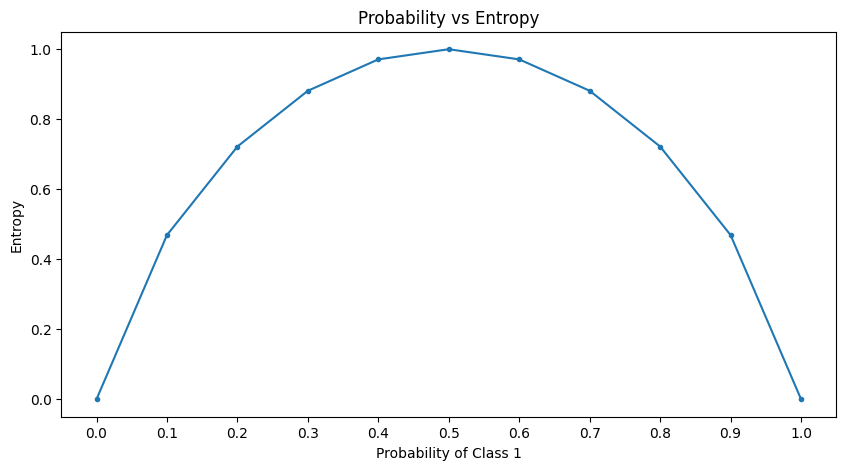

In [13]:
# next let's compare probability vs entropy for a 2 class case

# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# calculate entropy for each distribution

###########
# your code
ents = [entropy(p) for p in probs]
###########

# plot probability distribution vs entropy
plt.subplots(figsize=(10,5))
plt.plot(probs, ents, marker='.')
plt.title('Probability vs Entropy')
plt.xticks(probs)
plt.xlabel('Probability of Class 1')
plt.ylabel('Entropy')
plt.show()

##Exercise2: How to be a (small) decision tree




Imagine you're a decision tree and decided to split the data based on the feature `sex`.

Next we'll calculate the change in entropy of survival if we split our dataset based on `sex`.

In [14]:
# First calculate the entropy for survived/not-survived without splitting the data
probs = df['Survived'].value_counts(normalize = True)
print(probs)
# Calculate entropy
entInitial = entropy(probs[0])
f"Entropy: {entInitial:.2f}"

Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64


'Entropy: 0.96'

In [15]:
# Find the probility of survived/not-survived for women
probs = df[df['Sex'] == 1]['Survived'].value_counts(normalize=True)
print(probs)
# Calculate entropy
entWomen = entropy(probs[0])
f"Entropy: {entWomen:.2f}"

Survived
1    0.742038
0    0.257962
Name: proportion, dtype: float64


'Entropy: 0.82'

In [16]:
# Find the probility of survived/not-survived for men
probs = df[df['Sex'] == 0]['Survived'].value_counts(normalize=True)
print(probs)
# Calcuate entropy
entMen = entropy(probs[0])
f"Entropy: {entMen:.2f}"

Survived
0    0.809773
1    0.190227
Name: proportion, dtype: float64


'Entropy: 0.70'

In [17]:
# What's the decrease in entropy if we split by sex?
numWomen = df[df['Sex'] == 1].shape[0]
numMen = df[df['Sex'] == 0].shape[0]
entSex = (numWomen*entWomen + numMen*entMen)/(numWomen + numMen)
# decrease in entropy when we split data according to sex
print(entInitial - entSex)

0.2168495048312652


#Cross-validation: the hero we need

* We know from previous recitations that we split our dataset into training, validation and testing data.  
1. We use the *training data* to train our model.
2. Then we test this model several times using the *validation data* so we can find which hyperparameter is best for our problem.
3. Finally when we've chosen the best hyperparameter(s) and trained a 'best' model using those best hyperparameteres, we test the 'best' model one final time using the test data.

This procedure hepls us identify the 'best' model for our particular problem and estimate how well the model will generalize to new data.






However, there are 2 major problems with this 3-way partitioning of the dataset:

1. **We're 'wasting' a part of our dataset that we could have used to train a (maybe) better model.** The more data you have, the more likely it is that you will be able to train a successful ML model. This is because larger datsets are more likely to contain all possible examples your model needs to learn. This is especially relevant if you do not have a lot of data to being with.

2. **The results can depend on the specific split of training and validation data.** Because of this, maybe some examples the model needs to learn are absent in the training data because the (random) split happened in such a way that those examples were assigned to the validation (or test data)

#Cross Validation:  the hero we get


<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png   width="500" >




1. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV.

2. In the basic approach, called *k-fold CV*, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:

        *A model is trained using k - 1 folds as training data;
        *The resulting model is validated on the remaining fold of the data.

3. This approach can be computationally expensive, but does not waste too much data, which is a major advantage in problems where the number of samples is very small.

# CV using sklearn

In [18]:
from sklearn.model_selection import cross_val_score

model = tree.DecisionTreeClassifier() #Create decision tree classifier object

accuracies = cross_val_score(model, X_train, y_train, cv=5)
accuracies

array([0.73239437, 0.77464789, 0.83098592, 0.73943662, 0.77304965])

In [19]:
# Validation accuracy can be estimated using the mean of the CV accuracies
# Bonus: we can calculate a standard deviation over the different folds
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.77 (+/- 0.07)


## Exercise 3: Hyperparamter tuning using CV

In [20]:
# Find the best parameter for max_depth using 5-fold CV
accuracy_list = []
accuracy_SD_list = []

for depth in range (1, 10):
  model = tree.DecisionTreeClassifier(max_depth=depth)
  accuracies_CV = cross_val_score(model, X_train, y_train, cv=5)
  accuracy_list.append(accuracies_CV.mean())
  accuracy_SD_list.append(accuracies_CV.std())

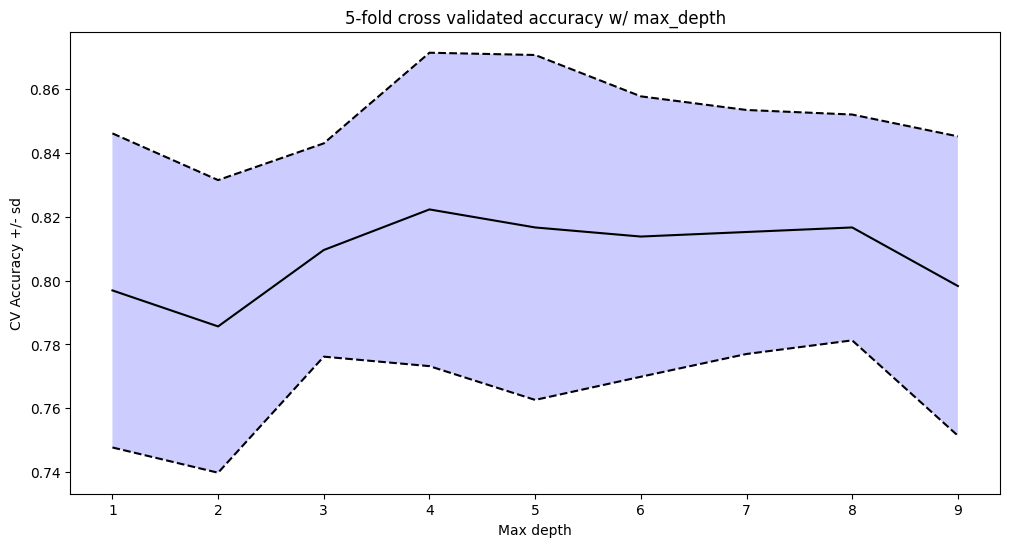

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy_list, color='black', linestyle='solid')
plt.plot(range(1, 10), np.array(accuracy_list) + np.array(accuracy_SD_list),color='black', linestyle='dashed')
plt.plot(range(1, 10), np.array(accuracy_list) - np.array(accuracy_SD_list),color='black', linestyle='dashed' )
plt.fill_between(range(1, 10), np.array(accuracy_list) + np.array(accuracy_SD_list),
                 np.array(accuracy_list) - np.array(accuracy_SD_list), alpha=0.2, facecolor ='b')
plt.plot()
plt.title('5-fold cross validated accuracy w/ max_depth')
plt.xlabel('Max depth')
plt.ylabel('CV Accuracy +/- sd')
plt.show()